<a id = '4.0'></a>
<p style = "font-size : 35px; color : #34656d ;  text-align : center; background-color : #08f9f9; border-radius: 5px 5px;"><strong>CEMENT_SLUMP</strong></p> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

## <span style='color:red'> Polinomial Regression</span> 

In [5]:
df = pd.read_csv("G-5 final_scout_full_dummy.csv")

In [6]:
df.head()

,price,km,nr._of_doors,nr._of_seats,displacement,cylinders,gears,age,previous_owners_2,hp_kw,weight_kg,consumption_comb,com_Air conditioning,com_Air suspension,com_Armrest,com_Automatic climate control,com_Auxiliary heating,com_Cruise control,com_Electric Starter,com_Electric tailgate,com_Electrical side mirrors,com_Electrically adjustable seats,com_Electrically heated windshield,com_Heads-up display,com_Heated steering wheel,com_Hill Holder,com_Keyless central door lock,com_Leather seats,com_Leather steering wheel,com_Light sensor,com_Lumbar support,com_Massage seats,com_Multi-function steering wheel,com_Navigation system,com_Panorama roof,com_Park Distance Control,com_Parking assist system camera,com_Parking assist system self-steering,com_Parking assist system sensors front,com_Parking assist system sensors rear,com_Power windows,com_Rain sensor,com_Seat heating,com_Seat ventilation,com_Split rear seats,com_Start-stop system,com_Sunroof,com_Tinted windows,com_Wind deflector,com_Windshield,...,saf_Immobilizer,saf_Isofix,saf_LED Daytime Running Lights,saf_LED Headlights,saf_Lane departure warning system,saf_Night view assist,saf_Passenger-side airbag,saf_Power steering,saf_Rear airbag,saf_Side airbag,saf_Tire pressure monitoring system,saf_Traction control,saf_Traffic sign recognition,saf_Xenon headlights,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Other,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,paint_type_Perl effect,paint_type_Uni/basic,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear,emission_class_Euro 5,emission_class_Euro 6,type_1_Employee's car,type_1_New,type_1_Pre-registered,type_1_Used,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG/CNG,upholstery_type_Full leather,upholstery_type_Part leather,upholstery_type_Velour,upholstery_type_alcantara
0,15770,56013.0,5.0,5.0,1422.0,3.0,7.0,3.0,2.0,66.0,1220.0,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,...,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0
1,14500,80000.0,3.0,4.0,1798.0,4.0,7.0,2.0,1.0,141.0,1255.0,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,...,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,14640,83450.0,4.0,4.0,1598.0,4.0,7.0,3.0,1.0,85.0,1255.0,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,...,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0
3,14500,73000.0,3.0,4.0,1422.0,3.0,6.0,3.0,1.0,66.0,1195.0,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,...,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0
4,16790,16200.0,5.0,5.0,1422.0,3.0,6.0,3.0,1.0,66.0,1195.0,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0


In [7]:
X = df.drop("price", axis =1)
y = df["price"]

In [8]:
X.head()

,km,nr._of_doors,nr._of_seats,displacement,cylinders,gears,age,previous_owners_2,hp_kw,weight_kg,consumption_comb,com_Air conditioning,com_Air suspension,com_Armrest,com_Automatic climate control,com_Auxiliary heating,com_Cruise control,com_Electric Starter,com_Electric tailgate,com_Electrical side mirrors,com_Electrically adjustable seats,com_Electrically heated windshield,com_Heads-up display,com_Heated steering wheel,com_Hill Holder,com_Keyless central door lock,com_Leather seats,com_Leather steering wheel,com_Light sensor,com_Lumbar support,com_Massage seats,com_Multi-function steering wheel,com_Navigation system,com_Panorama roof,com_Park Distance Control,com_Parking assist system camera,com_Parking assist system self-steering,com_Parking assist system sensors front,com_Parking assist system sensors rear,com_Power windows,com_Rain sensor,com_Seat heating,com_Seat ventilation,com_Split rear seats,com_Start-stop system,com_Sunroof,com_Tinted windows,com_Wind deflector,com_Windshield,ent_Bluetooth,...,saf_Immobilizer,saf_Isofix,saf_LED Daytime Running Lights,saf_LED Headlights,saf_Lane departure warning system,saf_Night view assist,saf_Passenger-side airbag,saf_Power steering,saf_Rear airbag,saf_Side airbag,saf_Tire pressure monitoring system,saf_Traction control,saf_Traffic sign recognition,saf_Xenon headlights,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Other,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,paint_type_Perl effect,paint_type_Uni/basic,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear,emission_class_Euro 5,emission_class_Euro 6,type_1_Employee's car,type_1_New,type_1_Pre-registered,type_1_Used,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG/CNG,upholstery_type_Full leather,upholstery_type_Part leather,upholstery_type_Velour,upholstery_type_alcantara
0,56013.0,5.0,5.0,1422.0,3.0,7.0,3.0,2.0,66.0,1220.0,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,...,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0
1,80000.0,3.0,4.0,1798.0,4.0,7.0,2.0,1.0,141.0,1255.0,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,...,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,83450.0,4.0,4.0,1598.0,4.0,7.0,3.0,1.0,85.0,1255.0,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0
3,73000.0,3.0,4.0,1422.0,3.0,6.0,3.0,1.0,66.0,1195.0,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,...,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0
4,16200.0,5.0,5.0,1422.0,3.0,6.0,3.0,1.0,66.0,1195.0,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,...,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0


### Polynomial Conversion

In [9]:
from sklearn.preprocessing import PolynomialFeatures

We create an artificial overfiting situation by taking poly feature from 5 degrees

In [11]:
polynomial_converter = PolynomialFeatures(degree=1, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

In [12]:
poly_features.shape

(15915, 141)

### Train | Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

## Scaling the Data

scaling : Fitting our data to the same ranges. 

Whether a feature is important or not in ML is expressed with coefficients. The ranges of my features can have different range values for each. If we don't do a scale, features in a large range are weighted more (valid for distance-based models) and our model will return incorrect results. We use scale to prevent this. It also accelerates the work of Gradient descent-based models such as linear, logistic regression.

There is no disadvantage of applying scale to data. data scale If you are confused about whether to apply it or not, you can apply scale directly.

Data leakage: Leakage of information about the data in the test set to the data in the train set

To prevent leakage, only fit operation is applied to X_train. On the other hand, only transform operation is applied to X_test. no fit operation is applied to all data.

Target is never scaled. 

In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Robustscaler is used when outlier could be present

scaler = MinMaxScaler()

In [67]:
scaler.fit(X_train)  # Apply just for X_tarin not for X_test (Kalıp çıkarma)

MinMaxScaler()

In [68]:
X_train_scaled = scaler.transform(X_train) # Apply transform according to fit
X_train_scaled

array([[2.57097792e-01, 0.00000000e+00, 6.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.78548896e-05, 3.33333333e-01, 6.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.77917981e-02, 1.00000000e+00, 6.00000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.36277603e-02, 1.00000000e+00, 4.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01892744e-02, 1.00000000e+00, 4.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.22618297e-02, 1.00000000e+00, 6.00000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [69]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[2.44321965e-01, 1.00000000e+00, 6.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.15457413e-05, 1.00000000e+00, 6.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.33123028e-01, 1.00000000e+00, 6.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.44321965e-01, 1.00000000e+00, 6.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.74353312e-02, 1.00000000e+00, 6.00000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.47003155e-02, 1.00000000e+00, 6.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

### checking std = 1 and mean = 0

this gives us the z-scores. so it's also called z-score scaling

These values show where in the normal distribution they correspond to the z score.


In [70]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round() #Applying aggregation across all the columns, mean and std will be found for each column in the dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
mean,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
mean,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [73]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [74]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [76]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear") # Evaluate the result. Overfitting?
ls

,linear_train,linear_test
R2,8.792059e-01,-3.114868e+20
mae,1.786500e+03,1.862847e+12
mse,6.661691e+06,1.657019e+28
rmse,2.581025e+03,1.287253e+14


## <span style='color:red'> Multicolineratiy</span> 

If there is a strong correlation between the independent variables, this situation is called **multicolineraty**.
 
**Multicolineraty** prevents my model from detecting important features.

In [26]:
def color_red(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'


In [27]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

## <span style='color:red'> Cross Validation</span> 

We do cross-validation to check whether the one-time scores we receive are consistent or not

cross validation is only applied to the train set.

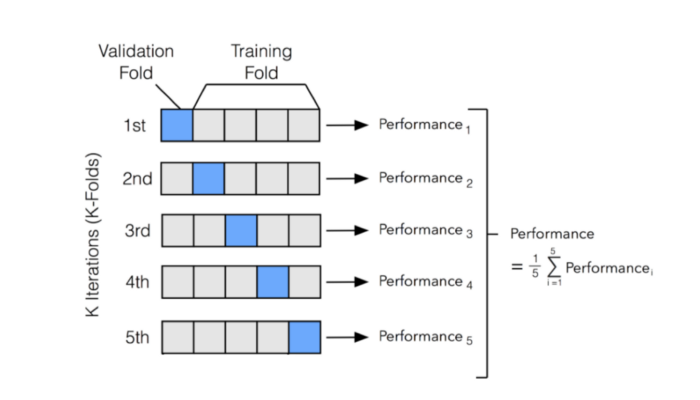

In [122]:
# from sklearn.metrics import SCORERS
# list(SCORERS.keys())

In [30]:
from sklearn.model_selection import cross_validate

In [31]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [32]:
scores

{'fit_time': array([0.29981279, 0.38379693, 0.21686459, 0.29181814, 0.37576032]),
 'score_time': array([0.00699496, 0.01099324, 0.00599575, 0.01298666, 0.02299213]),
 'test_r2': array([ 0.87003795,  0.87012122,  0.87576176,  0.87113863, -1.09838555]),
 'test_neg_mean_absolute_error': array([-1842.4369585 , -1823.79793836, -1774.09954785, -1858.92462178,
        -2011.33272833]),
 'test_neg_mean_squared_error': array([-7.08141108e+06, -7.70919288e+06, -6.70632761e+06, -7.23888971e+06,
        -1.08465906e+08]),
 'test_neg_root_mean_squared_error': array([ -2661.09208317,  -2776.54333379,  -2589.65781627,  -2690.51848388,
        -10414.69662176])}

In [33]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.299813,0.006995,0.870038,-1842.436958,-7.081411e+06,-2661.092083
2,0.383797,0.010993,0.870121,-1823.797938,-7.709193e+06,-2776.543334
3,0.216865,0.005996,0.875762,-1774.099548,-6.706328e+06,-2589.657816
4,0.291818,0.012987,0.871139,-1858.924622,-7.238890e+06,-2690.518484
5,0.375760,0.022992,-1.098386,-2011.332728,-1.084659e+08,-10414.696622


In [34]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             4.777348e-01
test_neg_mean_absolute_error       -1.862118e+03
test_neg_mean_squared_error        -2.744035e+07
test_neg_root_mean_squared_error   -4.226502e+03
dtype: float64

In [35]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,8.792073e-01,-2.331160e+18
mae,1.786459e+03,1.611548e+11
mse,6.661613e+06,1.240109e+26
rmse,2.581010e+03,1.113602e+13


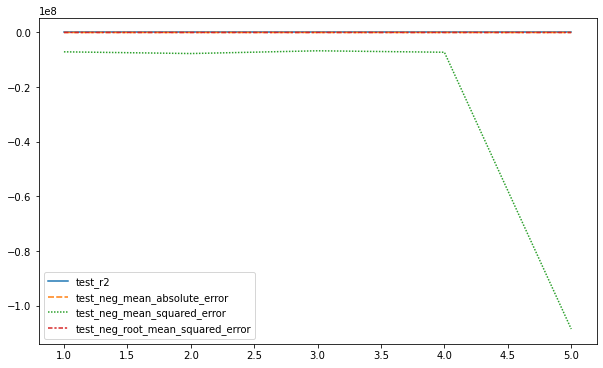

In [36]:
sns.lineplot(data = scores.iloc[:,2:]);

In [161]:
# lm.coef_

In [162]:
# lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
# lm_df

## <span style='color:red'> Ridge Regression</span> 

Ridge and lasso and elastic-net regression are a model tuning method that is used to analyse any data that suffers from multicollinearity, underfiting and overfiting. 

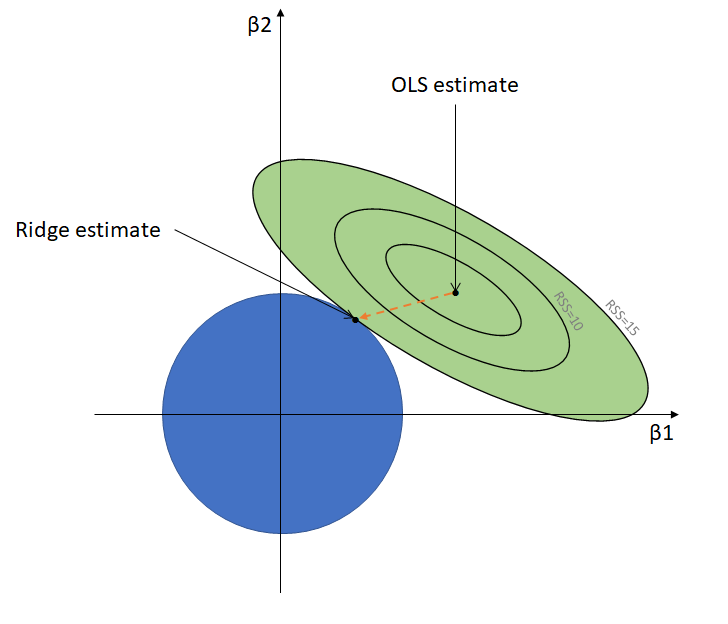

In [37]:
from sklearn.linear_model import Ridge

In [38]:
ridge_model = Ridge(alpha=1, random_state=42)

In [39]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [40]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [41]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,8.792073e-01,8.739187e-01
mae,1.786407e+03,1.818192e+03
mse,6.661614e+06,6.707157e+06
rmse,2.581010e+03,2.589818e+03


In [42]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,8.792073e-01,-2.331160e+18,8.792073e-01,8.739187e-01
mae,1.786459e+03,1.611548e+11,1.786407e+03,1.818192e+03
mse,6.661613e+06,1.240109e+26,6.661614e+06,6.707157e+06
rmse,2.581010e+03,1.113602e+13,2.581010e+03,2.589818e+03


## For Ridge Regression CV with alpha : 1 

In [43]:
model = Ridge(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [44]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.106937,0.016990,0.870034,-1842.389005,-7.081626e+06,-2661.132406
2,0.120524,0.012001,0.870115,-1823.767038,-7.709540e+06,-2776.605847
3,0.163894,0.008996,0.875773,-1773.958114,-6.705747e+06,-2589.545657
4,0.210859,0.008996,0.871137,-1858.909099,-7.238992e+06,-2690.537493
5,0.220864,0.006999,0.880084,-1800.135500,-6.198453e+06,-2489.669181


In [45]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             8.734286e-01
test_neg_mean_absolute_error       -1.819832e+03
test_neg_mean_squared_error        -6.986871e+06
test_neg_root_mean_squared_error   -2.641498e+03
dtype: float64

In [46]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,8.792073e-01,8.739187e-01
mae,1.786407e+03,1.818192e+03
mse,6.661614e+06,6.707157e+06
rmse,2.581010e+03,2.589818e+03


<AxesSubplot:>

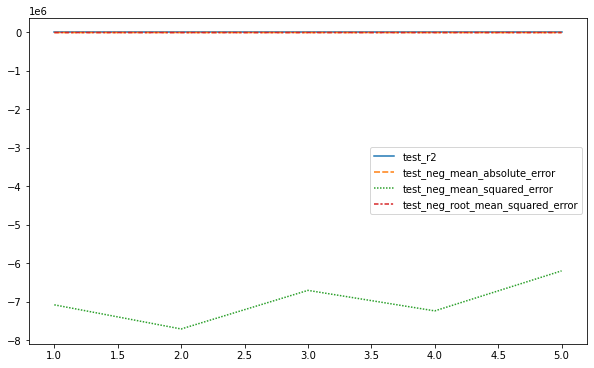

In [47]:
sns.lineplot(data = scores.iloc[:,2:])

In [48]:
ridge_model.coef_

array([-1.36837163e+03,  2.47568082e+02,  1.06521557e+01, -5.46211930e+02,
        1.56748659e+02,  5.97807095e+02, -9.86892006e+02, -3.85648362e+02,
        2.53205993e+03, -2.59739228e+02,  1.60817986e+02,  5.06699199e+01,
       -4.82800391e+00, -2.82438841e+00,  1.76024618e+02, -3.82268771e+01,
        1.53767862e+02,  0.00000000e+00, -4.18412396e+01,  7.13801818e+01,
        2.03568387e+01,  1.28699554e+02,  4.18022469e+02,  2.36903321e+02,
        8.24012066e+01,  4.58613833e+01, -2.94519207e+01,  5.02063828e-01,
        1.11714151e+02, -1.33788748e+02,  5.75551504e+01,  2.77217345e+01,
        1.35396839e+02, -6.88790671e+01,  2.55096192e+02,  6.04584001e+01,
        1.88136280e+02,  1.64213884e+02, -2.53649809e+02,  1.62957097e+01,
       -1.25373262e+02, -7.71159458e+01,  1.37534563e+02, -1.21643178e+02,
       -8.71371094e+00,  8.39455272e+01, -1.49536048e+01, -1.75664262e+01,
       -3.25441399e+00, -2.12879589e+02, -9.40684957e+00,  2.58445900e+02,
        6.13554515e+01, -

In [49]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [50]:
pd.concat([lm_df,rm_df], axis = 1)

NameError: name 'lm_df' is not defined

## Choosing best alpha value with Cross-Validation

In [51]:
from sklearn.linear_model import RidgeCV

In [52]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [53]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [54]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [55]:
ridge_cv_model.alpha_ #Ridge(alpha=0.02)

1.0

In [56]:
#rmse for ridge with CV
ridge_cv_model.best_score_

-2641.4981167096184

In [58]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [59]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,8.792073e-01,8.739187e-01
mae,1.786407e+03,1.818192e+03
mse,6.661614e+06,6.707157e+06
rmse,2.581010e+03,2.589818e+03


In [60]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,8.792073e-01,-2.331160e+18,8.792073e-01,8.739187e-01,8.792073e-01,8.739187e-01
mae,1.786459e+03,1.611548e+11,1.786407e+03,1.818192e+03,1.786407e+03,1.818192e+03
mse,6.661613e+06,1.240109e+26,6.661614e+06,6.707157e+06,6.661614e+06,6.707157e+06
rmse,2.581010e+03,1.113602e+13,2.581010e+03,2.589818e+03,2.581010e+03,2.589818e+03


In [169]:
# ridge_cv_model.coef_

In [170]:
# rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_coef_0.02"])

In [171]:
# pd.concat([lm_df,rm_df, rcm_df], axis = 1)

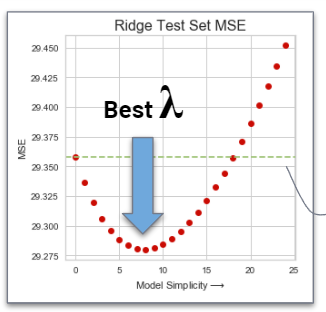

## <span style='color:red'> Lasso Regression</span> 

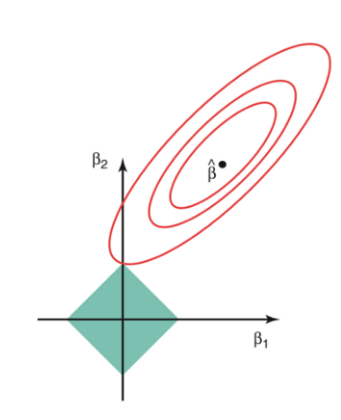

In [61]:
from sklearn.linear_model import Lasso, LassoCV

In [62]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [63]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [64]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,8.792009e-01,8.739626e-01
mae,1.785763e+03,1.817359e+03
mse,6.661962e+06,6.704824e+06
rmse,2.581078e+03,2.589367e+03


In [65]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,8.792073e-01,-2.331160e+18,8.792073e-01,8.739187e-01,8.792073e-01,8.739187e-01,8.792009e-01,8.739626e-01
mae,1.786459e+03,1.611548e+11,1.786407e+03,1.818192e+03,1.786407e+03,1.818192e+03,1.785763e+03,1.817359e+03
mse,6.661613e+06,1.240109e+26,6.661614e+06,6.707157e+06,6.661614e+06,6.707157e+06,6.661962e+06,6.704824e+06
rmse,2.581010e+03,1.113602e+13,2.581010e+03,2.589818e+03,2.581010e+03,2.589818e+03,2.581078e+03,2.589367e+03


## For Lasso CV with Default Alpha : 1

In [64]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [65]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.003906,0.003303,0.924246,-1.155268,-2.301550,-1.517086
2,0.004293,0.002173,0.955624,-0.656358,-1.000530,-1.000265
3,0.001580,0.001387,0.888327,-1.072936,-3.099952,-1.760668
4,0.003125,0.003349,0.896199,-1.255165,-2.825429,-1.680901
5,0.001609,0.001378,0.903545,-1.056538,-1.783470,-1.335466


In [66]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.913588
test_neg_mean_absolute_error       -1.039253
test_neg_mean_squared_error        -2.202186
test_neg_root_mean_squared_error   -1.458877
dtype: float64

In [67]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.919650,0.918590
mae,1.018355,1.017959
mse,2.114491,2.298390
rmse,1.454129,1.516044


<AxesSubplot:>

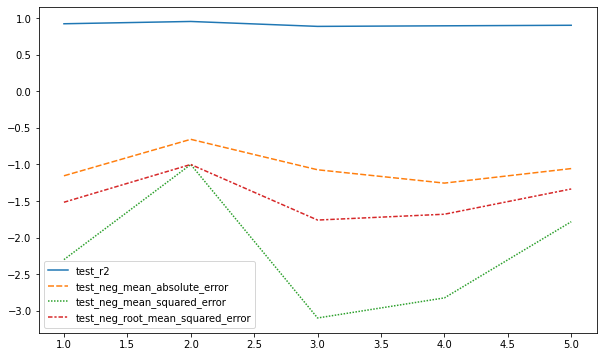

In [68]:
sns.lineplot(data = scores.iloc[:,2:])

In [69]:
lasso_model.coef_

array([0.6960164 , 0.        , 0.        , 0.        , 3.49094634,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [70]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [71]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1
0,13.942084,3.428822,6.383047,0.696016
1,-3.147845,0.689086,0.709275,0.000000
2,0.622117,0.170305,0.478838,0.000000
3,-58.348614,-0.910850,-8.015483,0.000000
4,17.227695,2.723077,3.997813,3.490946
5,-3.875031,0.112909,-0.714940,0.000000
6,14.688014,-0.404686,-0.509197,0.000000
7,0.835494,0.287950,0.727012,0.000000
8,-2.765824,-0.091937,-0.883005,0.000000
9,115.503087,-1.014535,2.244645,0.000000


### Choosing best alpha value with Cross-Validation

In [72]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42) 

In [73]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [74]:
lasso_cv_model.alpha_

0.01

In [75]:
np.where(alpha_space[::-1]==lasso_cv_model.alpha_)

(array([99]),)

In [76]:
alpha_space[::-1]

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [77]:
#mse score for CV
lasso_cv_model.mse_path_[99].mean()

0.4118332980703248

In [78]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [79]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.988824,0.986295
mae,0.339065,0.440975
mse,0.294098,0.386919
rmse,0.542308,0.622028


In [80]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028


In [81]:
lasso_cv_model.coef_

array([ 4.27021377,  0.18037374,  0.13965856, -3.14605513,  4.15339959,
       -0.        ,  0.        ,  0.06249654,  0.        , -0.        ,
       -0.43049816, -0.17433788,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.4873868 ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06929818,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [82]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [83]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01
0,13.942084,3.428822,6.383047,0.696016,4.270214
1,-3.147845,0.689086,0.709275,0.000000,0.180374
2,0.622117,0.170305,0.478838,0.000000,0.139659
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055
4,17.227695,2.723077,3.997813,3.490946,4.153400
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000
6,14.688014,-0.404686,-0.509197,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000


## <span style='color:red'> Elastic net</span> 

In [84]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [85]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42) # l1_ratio: 1: Lasso or 0:Ridge
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [86]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [87]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.896126,0.902016
mae,1.248480,1.200654
mse,2.733565,2.766287
rmse,1.653350,1.663216


In [88]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295,0.896126,0.902016
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975,1.248480,1.200654
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919,2.733565,2.766287
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028,1.653350,1.663216


## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [89]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [90]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.915497,-1.255282,-2.567362,-1.602299
2,0.928138,-0.960011,-1.620225,-1.272881
3,0.855390,-1.373843,-4.014250,-2.003559
4,0.875648,-1.431847,-3.384817,-1.839787
5,0.840262,-1.449269,-2.953597,-1.718603


In [91]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.882987
test_neg_mean_absolute_error       -1.294050
test_neg_mean_squared_error        -2.908050
test_neg_root_mean_squared_error   -1.687426
dtype: float64

In [92]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.896126,0.902016
mae,1.248480,1.200654
mse,2.733565,2.766287
rmse,1.653350,1.663216


In [93]:
elastic_model.coef_

array([ 0.8629361 ,  0.2114429 ,  0.        ,  0.29076735,  0.98099122,
        0.00249769,  0.        ,  0.        ,  0.        ,  0.        ,
        0.52021768,  0.        ,  0.6023984 ,  0.09615974,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.15970242,  0.        ,  0.27423182,  0.        ,  0.        ,
        0.3407246 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.0826519 ,  0.        ,  0.        ,  0.        ,  0.15709256,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [94]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [95]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,13.942084,3.428822,6.383047,0.696016,4.270214,0.862936
1,-3.147845,0.689086,0.709275,0.000000,0.180374,0.211443
2,0.622117,0.170305,0.478838,0.000000,0.139659,0.000000
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055,0.290767
4,17.227695,2.723077,3.997813,3.490946,4.153400,0.980991
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000,0.002498
6,14.688014,-0.404686,-0.509197,0.000000,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497,0.000000
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000,0.000000


### Choosing best alpha and l1_ratio values with Cross-Validation

In [96]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)

In [97]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [98]:
elastic_cv_model.alpha_

0.01

In [99]:
elastic_cv_model.l1_ratio_

1.0

In [172]:
#mse score for CV
# elastic_cv_model.mse_path_[5][-1].mean()

In [101]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [102]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.988824,0.986295
mae,0.339065,0.440975
mse,0.294098,0.386919
rmse,0.542308,0.622028


In [103]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295,0.896126,0.902016,0.988824,0.986295
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975,1.248480,1.200654,0.339065,0.440975
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919,2.733565,2.766287,0.294098,0.386919
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028,1.653350,1.663216,0.542308,0.622028


In [104]:
elastic_cv_model.coef_

array([ 4.27021377,  0.18037374,  0.13965856, -3.14605513,  4.15339959,
       -0.        ,  0.        ,  0.06249654,  0.        , -0.        ,
       -0.43049816, -0.17433788,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.4873868 ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06929818,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [105]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [106]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)","elastic_coef_(alp:0.01, l1:1)"
0,13.942084,3.428822,6.383047,0.696016,4.270214,0.862936,4.270214
1,-3.147845,0.689086,0.709275,0.000000,0.180374,0.211443,0.180374
2,0.622117,0.170305,0.478838,0.000000,0.139659,0.000000,0.139659
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055,0.290767,-3.146055
4,17.227695,2.723077,3.997813,3.490946,4.153400,0.980991,4.153400
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000,0.002498,-0.000000
6,14.688014,-0.404686,-0.509197,0.000000,0.000000,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497,0.000000,0.062497
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000,0.000000,-0.000000


## <span style='color:red'> Grid Search</span> 

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [125]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [159]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [160]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [112]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [113]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030683,0.012300,0.001315,0.000409,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-0.586201,-0.693806,-1.184123,-0.491352,-0.490280,-0.689152,0.258570,13
1,0.008148,0.002968,0.001707,0.000894,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-0.553277,-0.537915,-1.172816,-0.488299,-0.493055,-0.649072,0.263070,10
2,0.021137,0.012190,0.001379,0.000834,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7}",-0.529432,-0.527849,-1.157311,-0.480464,-0.500409,-0.639093,0.259749,9
3,0.029668,0.013644,0.005314,0.008847,0.01,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9}",-0.490240,-0.504487,-1.120156,-0.446524,-0.484072,-0.609096,0.256247,6
4,0.025489,0.008320,0.002570,0.001822,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-0.470398,-0.497256,-1.110933,-0.437316,-0.481998,-0.599580,0.256435,3
5,0.011600,0.003193,0.000833,0.000278,0.01,0.99,"{'alpha': 0.01, 'l1_ratio': 0.99}",-0.455118,-0.493277,-1.098376,-0.430248,-0.484677,-0.592339,0.254000,2
6,0.008165,0.001748,0.001482,0.000676,0.01,1,"{'alpha': 0.01, 'l1_ratio': 1}",-0.451422,-0.492426,-1.094927,-0.428596,-0.486989,-0.590872,0.253114,1
7,0.016527,0.004957,0.001088,0.000578,0.012,0.1,"{'alpha': 0.012, 'l1_ratio': 0.1}",-0.606883,-0.654207,-1.214541,-0.509165,-0.495180,-0.695995,0.266011,14
8,0.010062,0.002475,0.001943,0.002199,0.012,0.5,"{'alpha': 0.012, 'l1_ratio': 0.5}",-0.573940,-0.553763,-1.195471,-0.509639,-0.498213,-0.666205,0.266088,12
9,0.009193,0.002494,0.002554,0.002241,0.012,0.7,"{'alpha': 0.012, 'l1_ratio': 0.7}",-0.552026,-0.551934,-1.180732,-0.504933,-0.506986,-0.659322,0.261517,11


In [114]:
grid_model.best_index_

6

In [115]:
grid_model.best_score_

-0.5908719878682445

## Using Best Hyper Parameters From GridSearch

In [116]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [117]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.988824,0.986295
mae,0.339065,0.440975
mse,0.294098,0.386919
rmse,0.542308,0.622028


## Final Model

In [118]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [119]:
final_model = Lasso(alpha=0.01) #lasso_cv_model

In [120]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)

## Feature importances with Ridge

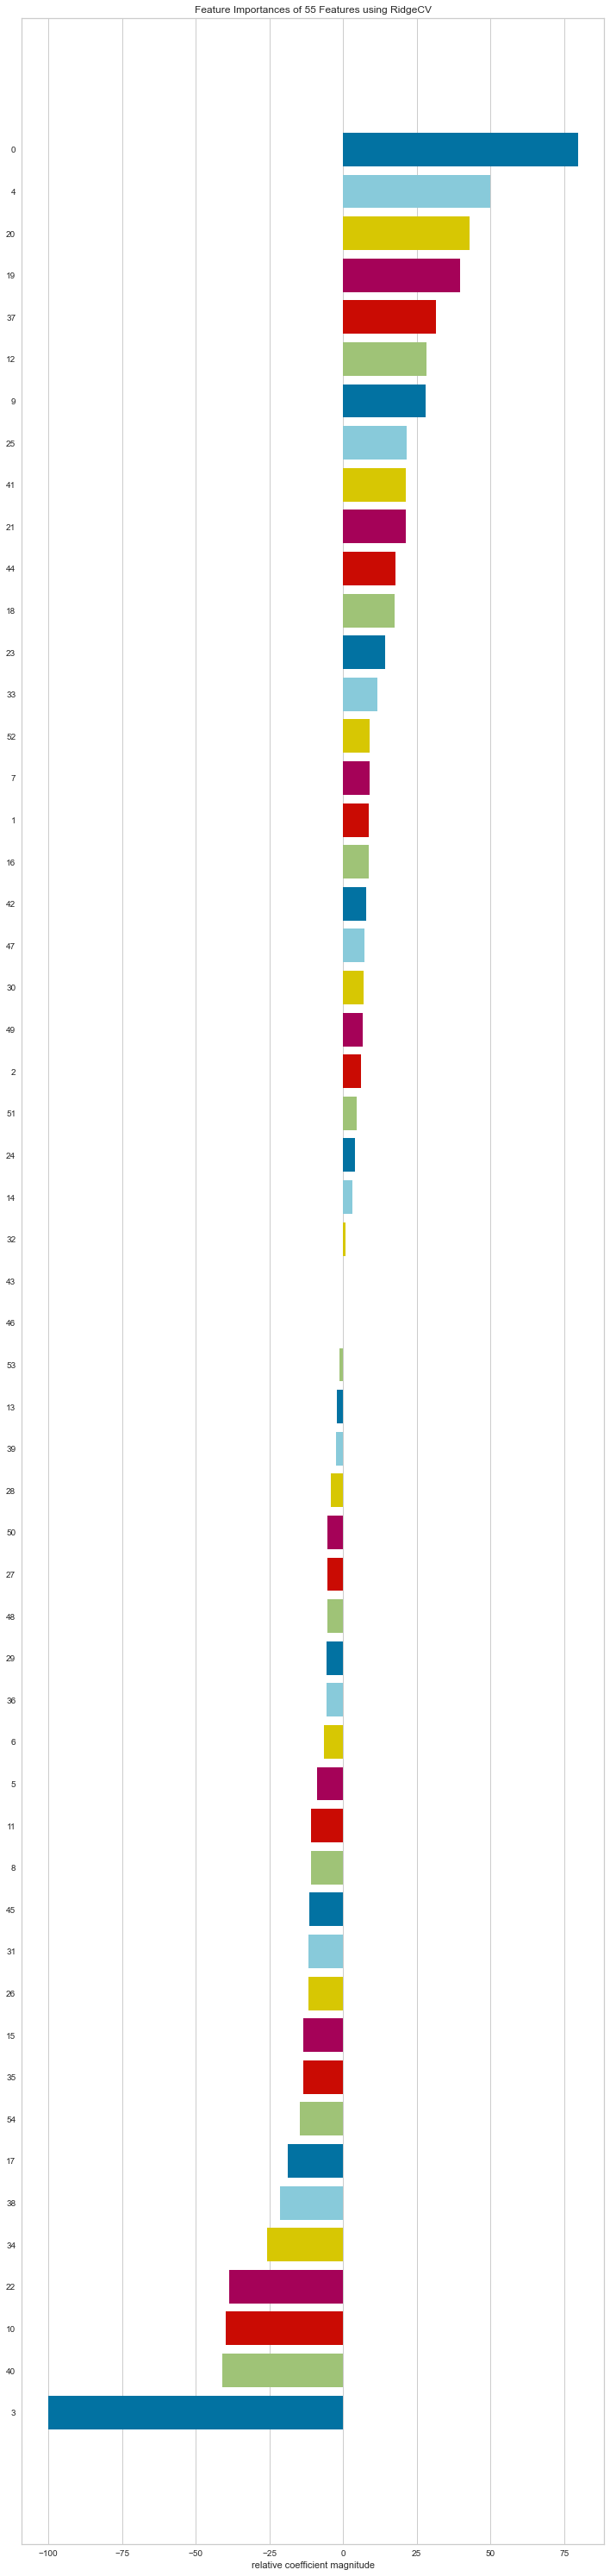

<AxesSubplot:title={'center':'Feature Importances of 55 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

## Feature importances with Lasso

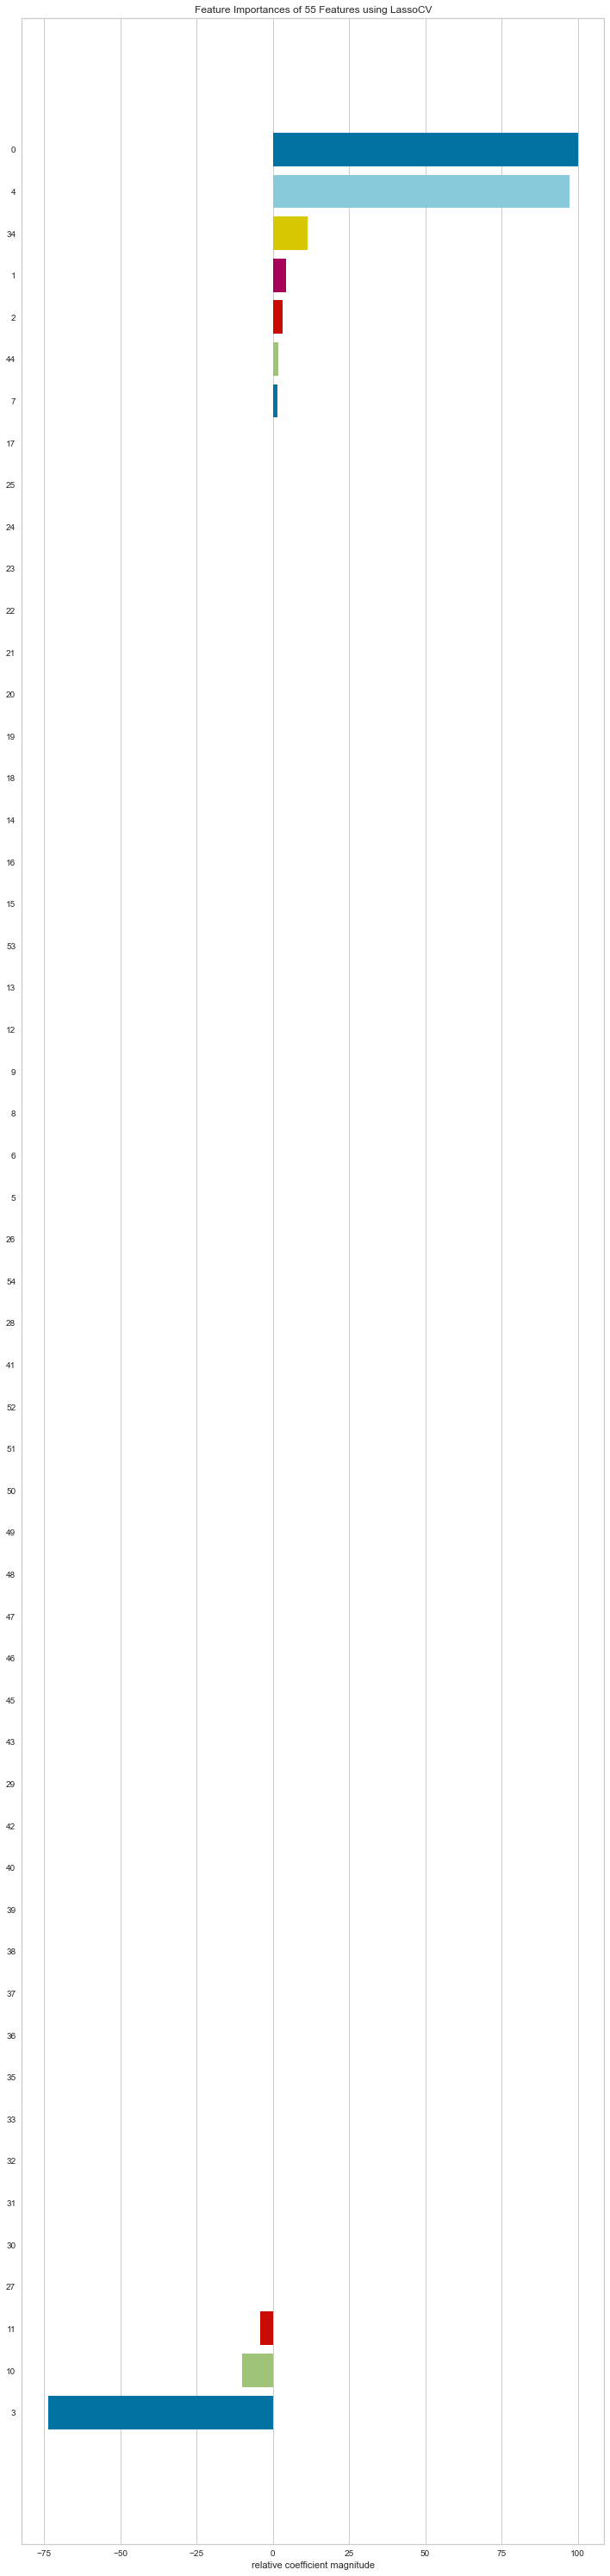

<AxesSubplot:title={'center':'Feature Importances of 55 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()